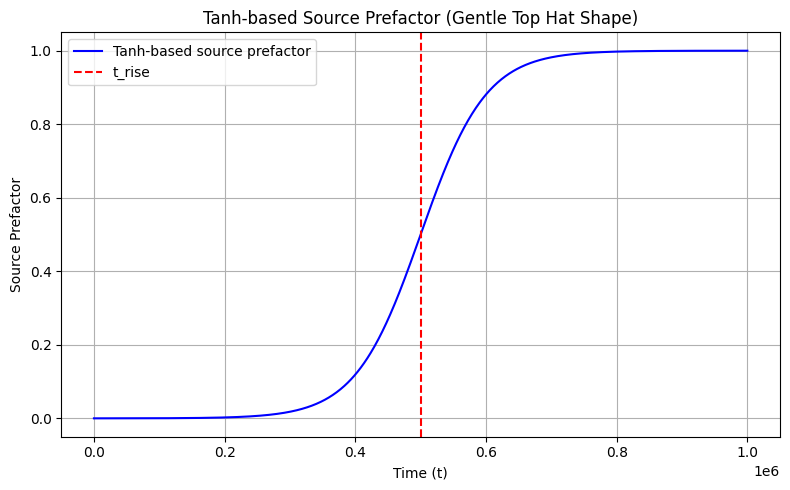

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
t_rise = 0.5e6  # When the transition starts
t_width = 0.1e6  # How smooth the rise/fall is
t_max = 1e6  # Maximum time for the plot

# Define the tanh-based source prefactor
def source_prefactor(t, t_rise, t_width):
    return 0.5 * (1 + np.tanh((t - t_rise) / t_width))

# Create a time array
t = np.linspace(0, t_max, 1000)

# Calculate the source prefactor for each time point
source = source_prefactor(t, t_rise, t_width)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(t, source, label='Tanh-based source prefactor', color='blue')
plt.axvline(x=t_rise, color='red', linestyle='--', label='t_rise')
plt.title('Tanh-based Source Prefactor (Gentle Top Hat Shape)')
plt.xlabel('Time (t)')
plt.ylabel('Source Prefactor')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


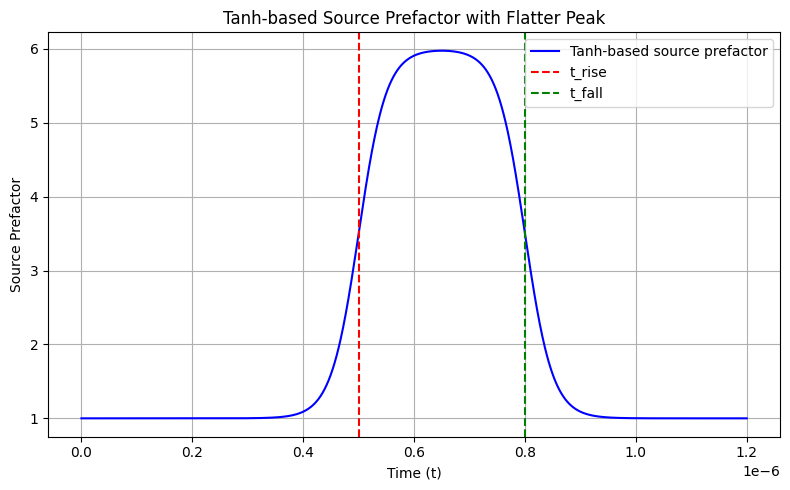

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t_rise = 0.5e-6
t_width_rise = 0.05e-6
t_width_fall = 0.05e-6
t_hold = 0.3e-6
t_max = 1.2e-6
base_power = 1
peak_power = 6

def source_prefactor(t, t_rise, t_width_rise, t_width_fall, t_hold, base_power, peak_power):
    rise = 0.5 * (1 + np.tanh((t - t_rise) / t_width_rise))
    fall = 0.5 * (1 + np.tanh((t_rise + t_hold - t) / t_width_fall))
    return base_power + (peak_power - base_power) * rise * fall

t = np.linspace(0, t_max, 1000)
source = source_prefactor(t, t_rise, t_width_rise, t_width_fall, t_hold, base_power, peak_power)

plt.figure(figsize=(8, 5))
plt.plot(t, source, label='Tanh-based source prefactor', color='blue')
plt.axvline(x=t_rise, color='red', linestyle='--', label='t_rise')
plt.axvline(x=t_rise + t_hold, color='green', linestyle='--', label='t_fall')
plt.title('Tanh-based Source Prefactor with Flatter Peak')
plt.xlabel('Time (t)')
plt.ylabel('Source Prefactor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
